<h1 style= 'color: red; font-size: 36px'>Guerra na Ucrania</h1>

<h1 style= 'font-size: 30px; color: DarkSlateGrey'>Análise das Baixas Russas</h1>
<hr style= 'border: 2px solid blue'>

In [98]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize= (14, 6))

In [2]:
dados = pd.read_csv('dados/russia_losses_personnel.csv')

In [3]:
dados

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0
...,...,...,...,...,...
334,2023-01-25,336,123080,about,NaN
335,2023-01-26,337,123860,about,NaN
336,2023-01-27,338,124710,about,NaN
337,2023-01-28,339,125510,about,NaN


In [8]:
dados_ = dados.drop(columns=['personnel*', 'POW'])
dados_

,date,day,personnel
0,2022-02-25,2,2800
1,2022-02-26,3,4300
2,2022-02-27,4,4500
3,2022-02-28,5,5300
4,2022-03-01,6,5710
...,...,...,...
334,2023-01-25,336,123080
335,2023-01-26,337,123860
336,2023-01-27,338,124710
337,2023-01-28,339,125510


In [88]:
x= dados_['date']
y= dados_['personnel']

In [89]:
dados_['date'] = pd.to_datetime(dados_['date'])

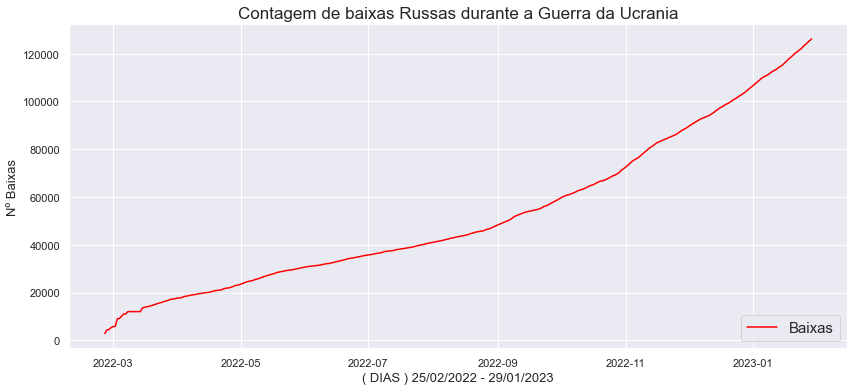

In [111]:
fig = plt.figure(figsize=(12,5))
eixo = fig.add_axes([0, 0, 0.9, 0.9])
eixo.plot(x, y, color='red')
eixo.set_title('Contagem de baixas Russas durante a Guerra da Ucrania', fontsize=17)
eixo.set_ylabel('Nº Baixas', fontsize=13)
eixo.set_xlabel('( DIAS ) 25/02/2022 - 29/01/2023', fontsize=13)
eixo.legend(['Baixas'], loc= 'lower right', fontsize=15)

In [86]:
import datetime

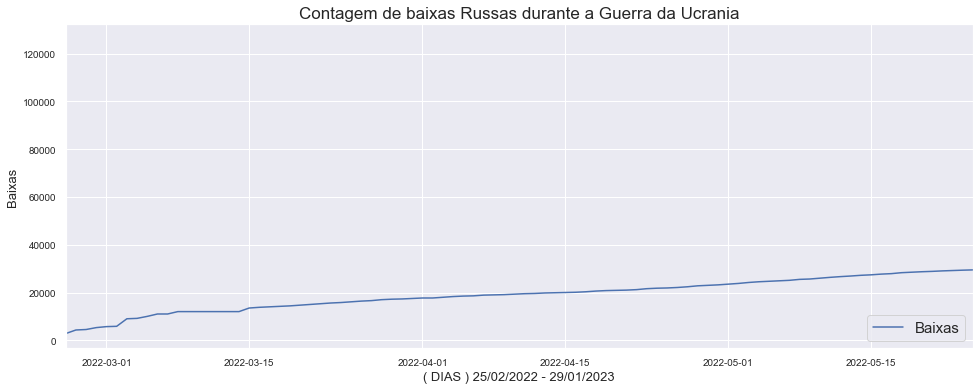

In [132]:
fig = plt.figure(figsize=(14,5))
eixo = fig.add_axes([0, 0, 0.9, 0.9])
eixo.plot(dados_['date'], y)

eixo.set_xlim(datetime.datetime(2022,2,25), datetime.datetime(2022,5,25))
eixo.set_title('Contagem de baixas Russas durante a Guerra da Ucrania', fontsize=17)
eixo.set_ylabel('Baixas', fontsize=13)
eixo.set_xlabel('( DIAS ) 25/02/2022 - 29/01/2023', fontsize=13)
eixo.legend(['Baixas'], loc= 'lower right', fontsize=15)

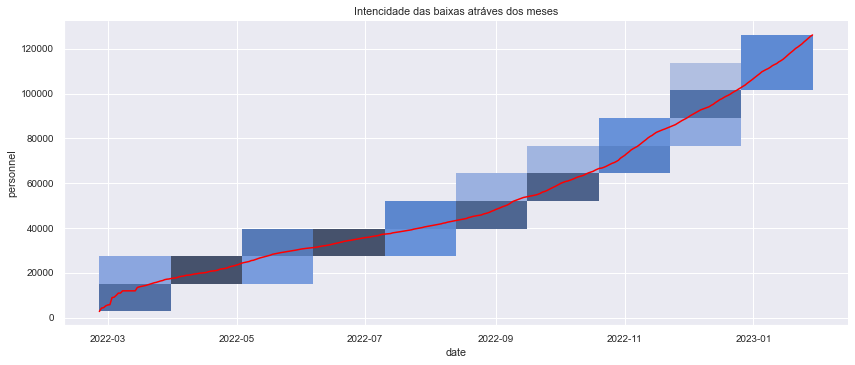

In [131]:
ax = sns.displot(data=dados_, x="date", y="personnel").set(title='Intencidade das baixas atráves dos meses')
ax = sns.lineplot(data=dados_, x="date", y="personnel", color='red')
ax.figure.set_size_inches(14,5)

In [134]:
total_baixas = dados_['personnel'].sum()
total_baixas

17878406

In [137]:
(126160 - 2800)/2800

44.05714285714286